<a href="https://colab.research.google.com/github/riddhipatel09/AI-ML/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
data = {
    "Age": [25, 35, 45, 28, 50, np.nan, 40, 120],
    "AnnualIncome": [300000, 500000, 700000, 400000, np.nan, 600000, 550000, 10000000],
    "MonthlyUsage": [120, 200, 180, 150, 300, 210, np.nan, 5000],
    "City": ["Ahmedabad", "Mumbai", "Delhi", "Mumbai", "Delhi", "Ahmedabad", "Delhi", "Mumbai"],
    "SubscriptionType": ["Basic", "Premium", "Premium", "Basic", "Premium", "Basic", "Basic", "Premium"]
}

df = pd.DataFrame(data)
df


,Age,AnnualIncome,MonthlyUsage,City,SubscriptionType
0,25.0,300000.0,120.0,Ahmedabad,Basic
1,35.0,500000.0,200.0,Mumbai,Premium
2,45.0,700000.0,180.0,Delhi,Premium
3,28.0,400000.0,150.0,Mumbai,Basic
4,50.0,NaN,300.0,Delhi,Premium
5,NaN,600000.0,210.0,Ahmedabad,Basic
6,40.0,550000.0,NaN,Delhi,Basic
7,120.0,10000000.0,5000.0,Mumbai,Premium


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               7 non-null      float64
 1   AnnualIncome      7 non-null      float64
 2   MonthlyUsage      7 non-null      float64
 3   City              8 non-null      object 
 4   SubscriptionType  8 non-null      object 
dtypes: float64(3), object(2)
memory usage: 452.0+ bytes


,Age,AnnualIncome,MonthlyUsage
count,7.000000,7.000000e+00,7.000000
mean,49.000000,1.864286e+06,880.000000
std,32.537158,3.589883e+06,1817.626658
min,25.000000,3.000000e+05,120.000000
25%,31.500000,4.500000e+05,165.000000
50%,40.000000,5.500000e+05,200.000000
75%,47.500000,6.500000e+05,255.000000
max,120.000000,1.000000e+07,5000.000000


In [4]:
# Numerical: fill with median
df["Age"].fillna(df["Age"].median(), inplace=True)
df["AnnualIncome"].fillna(df["AnnualIncome"].median(), inplace=True)
df["MonthlyUsage"].fillna(df["MonthlyUsage"].median(), inplace=True)


/tmp/ipython-input-763465943.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-763465943.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [5]:
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])

remove_outliers("Age")
remove_outliers("AnnualIncome")
remove_outliers("MonthlyUsage")


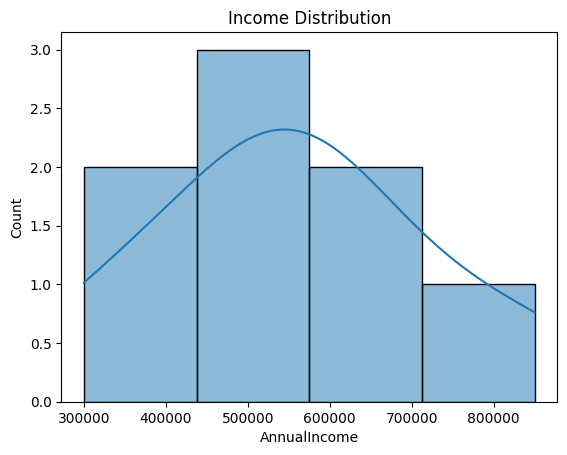

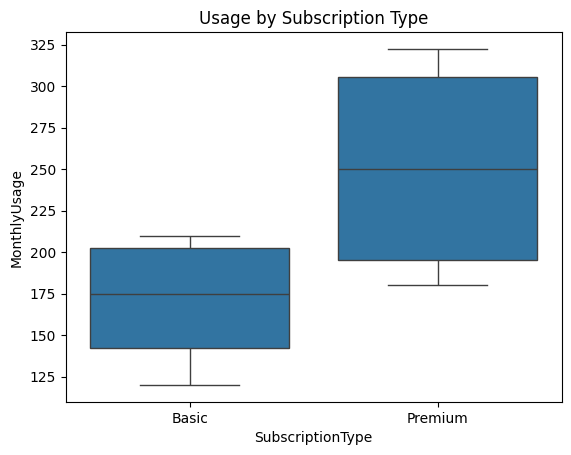

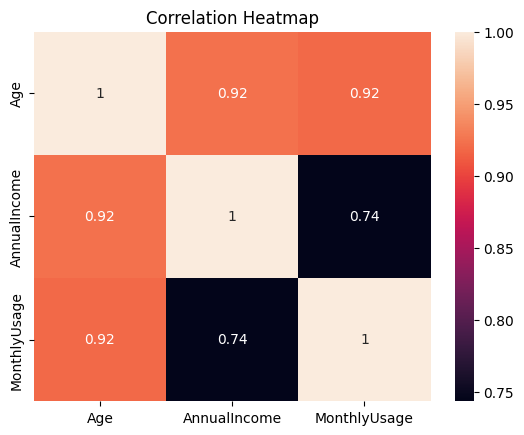

In [6]:
plt.figure()
sns.histplot(df["AnnualIncome"], kde=True)
plt.title("Income Distribution")
plt.show()

plt.figure()
sns.boxplot(x="SubscriptionType", y="MonthlyUsage", data=df)
plt.title("Usage by Subscription Type")
plt.show()

plt.figure()
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [10]:
df_encoded = pd.get_dummies(df, columns=["City", "SubscriptionType"], drop_first=True)
df_encoded


,Age,AnnualIncome,MonthlyUsage,City_Delhi,City_Mumbai,SubscriptionType_Premium
0,25.00,300000.0,120.0,False,False,False
1,35.00,500000.0,200.0,False,True,True
2,45.00,700000.0,180.0,True,False,True
3,28.00,400000.0,150.0,False,True,False
4,50.00,550000.0,300.0,True,False,True
5,40.00,600000.0,210.0,False,False,False
6,40.00,550000.0,200.0,True,False,False
7,65.75,850000.0,322.5,False,True,True


In [11]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df_standardized = df_encoded.copy()
df_standardized[df_standardized.columns] = scaler_standard.fit_transform(df_standardized)

df_normalized = df_encoded.copy()
df_normalized[df_normalized.columns] = scaler_minmax.fit_transform(df_normalized)


In [12]:
print("Why Feature Engineering Matters:")
print("- Scaling ensures equal contribution of features.")
print("- Encoding enables categorical data to be used in ML models.")
print("- Clean data improves model accuracy and generalization.")


Why Feature Engineering Matters:
- Scaling ensures equal contribution of features.
- Encoding enables categorical data to be used in ML models.
- Clean data improves model accuracy and generalization.
